In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]

Match1 = Delhi Home Ground

Match2 = Hyderabad Home Ground

# Overall Delhi vs Hyderabad:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season           city        date             team1  \
393   394    2013          Delhi  2013-04-12  Delhi Daredevils   
427   428    2013      Hyderabad  2013-05-04  Delhi Daredevils   
488   489    2014          Delhi  2014-05-10  Delhi Daredevils   
530   531    2015  Visakhapatnam  2015-04-18  Delhi Daredevils   
671  7929    2018      Hyderabad    05/05/18  Delhi Daredevils   

                   team2          toss_winner toss_decision  result  \
393  Sunrisers Hyderabad     Delhi Daredevils           bat  normal   
427  Sunrisers Hyderabad     Delhi Daredevils           bat  normal   
488  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
530  Sunrisers Hyderabad     Delhi Daredevils           bat  normal   
671  Sunrisers Hyderabad     Delhi Daredevils           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
393           0  Sunrisers Hyderabad            0               3   
427           0  Sunrisers Hyderabad            0               6   
488           1  Sunrisers Hyderabad            0               8   
530           0     Delhi Daredevils            4               0   
671           0  Sunrisers Hyderabad            0               7   

    player_of_match                                              venue  \
393        A Mishra                                   Feroz Shah Kotla   
427       DJG Sammy          Rajiv Gandhi International Stadium, Uppal   
488        DW Steyn                                   Feroz Shah Kotla   
530       JP Duminy  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
671     Rashid Khan          Rajiv Gandhi International Stadium, Uppal   

            umpire1       umpire2                umpire3  
393       Aleem Dar   Subroto Das                    NaN  
427       Asad Rauf      S Asnani                    NaN  
488    RM Deshpande  BNJ Oxenford                    NaN  
530       PG Pathak        S Ravi                    NaN  
671  Bruce Oxenford      O Nandan  Virender Kumar Sharma

Matches played between Delhi and Hyderabad.

In [6]:
match.shape

(15, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad    9
Delhi Daredevils       4
Delhi Capitals         2
Name: winner, dtype: int64

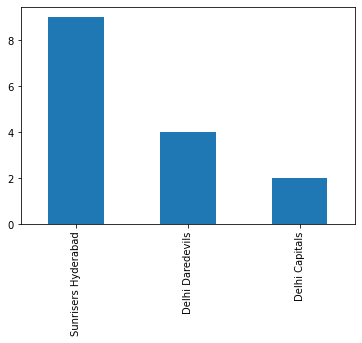

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

**Hyderabad won 9 times and Delhi won 6 times against each other.**

In [9]:
match['toss_winner'].value_counts()

Delhi Daredevils       8
Sunrisers Hyderabad    6
Delhi Capitals         1
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

bat      8
field    7
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Sunrisers Hyderabad    5
Delhi Daredevils       4
Delhi Capitals         1
Name: winner, dtype: int64

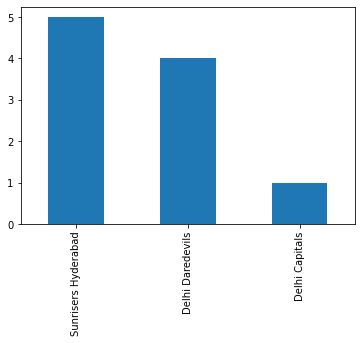

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Both won the toss and won the match 5 times. But Delhi won 5 times out of 6 times when they won the toss. So winning toss has effects for Delhi to winning the match.**

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team      bowling_team  over  ball  \
4810        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     1   
4811        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     2   
4812        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     3   
4813        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     4   
4814        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     5   

        batsman non_striker   bowler  is_super_over  ...  bye_runs  \
4810  DA Warner    S Dhawan  J Yadav              0  ...         0   
4811   S Dhawan   DA Warner  J Yadav              0  ...         0   
4812   S Dhawan   DA Warner  J Yadav              0  ...         0   
4813  DA Warner    S Dhawan  J Yadav              0  ...         0   
4814  DA Warner    S Dhawan  J Yadav              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
4810            0            1             0             1           1   
4811            0            0             0             4           0   
4812            0            0             0             1           0   
4813            0            0             0             0           0   
4814            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
4810           2               NaN            NaN     NaN  
4811           4               NaN            NaN     NaN  
4812           1               NaN            NaN     NaN  
4813           0               NaN            NaN     NaN  
4814           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Delhi and Hyderabad.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many balls more/less will DC take to reach a score total of 20 runs from after they reach a team total of 30 as compared to SRH:

In [15]:
ball_taken_Hyderabad_batting_first_score_30 = []
ball_taken_Delhi_batting_second_score_30 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 30:
            break
    if total_runs_Hyderabad >= 30:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_first_score_30.append(total_balls_Hyderabad)
    runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Delhi = 0
    run_list_Delhi = []
    wide_Delhi = 0
    noball_Delhi = 0
    total_balls_Delhi = 0
    for i in range(0,len(runs_Delhi)):
        total_runs_Delhi += runs_Delhi[i]
        run_list_Delhi.append(runs_Delhi[i])
        if wide_runs_Delhi[i] > 0:
            wide_Delhi += 1
        elif noball_runs_Delhi[i] > 0:
            noball_Delhi += 1
        if total_runs_Delhi >= 30:
            break
    if total_runs_Delhi >= 30:
        total_balls_Delhi = len(run_list_Delhi) - wide_Delhi - noball_Delhi
    if total_balls_Delhi > 0:
        ball_taken_Delhi_batting_second_score_30.append(total_balls_Delhi)
print(ball_taken_Delhi_batting_second_score_30)
print(ball_taken_Hyderabad_batting_first_score_30)

[20, 22, 25, 27, 22, 28, 24]
[29, 20, 23, 23, 25, 24, 18]


These balls are taken by Delhi and Hyderabad to score 30 runs while Hyderabad batting first.

In [16]:
ball_taken_Hyderabad_batting_first_score_50 = []
ball_taken_Delhi_batting_second_score_50 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 50:
            break
    if total_runs_Hyderabad >= 50:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_first_score_50.append(total_balls_Hyderabad)
    runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Delhi = 0
    run_list_Delhi = []
    wide_Delhi = 0
    noball_Delhi = 0
    total_balls_Delhi = 0
    for i in range(0,len(runs_Delhi)):
        total_runs_Delhi += runs_Delhi[i]
        run_list_Delhi.append(runs_Delhi[i])
        if wide_runs_Delhi[i] > 0:
            wide_Delhi += 1
        elif noball_runs_Delhi[i] > 0:
            noball_Delhi += 1
        if total_runs_Delhi >= 50:
            break
    if total_runs_Delhi >= 50:
        total_balls_Delhi = len(run_list_Delhi) - wide_Delhi - noball_Delhi
    if total_balls_Delhi > 0:
        ball_taken_Delhi_batting_second_score_50.append(total_balls_Delhi)
print(ball_taken_Delhi_batting_second_score_50)
print(ball_taken_Hyderabad_batting_first_score_50)

[31, 31, 40, 38, 36, 46, 28]
[42, 31, 34, 45, 34, 42, 34]


These balls are taken by Delhi and Hyderabad to score 50 runs while Hyderabad batting first.

In [17]:
ball_taken_Hyderabad_batting_first = pd.Series(ball_taken_Hyderabad_batting_first_score_50) - pd.Series(ball_taken_Hyderabad_batting_first_score_30)
ball_taken_Delhi_batting_second = pd.Series(ball_taken_Delhi_batting_second_score_50) - pd.Series(ball_taken_Delhi_batting_second_score_30)
print(list(ball_taken_Hyderabad_batting_first))
print(list(ball_taken_Delhi_batting_second))
avg_balls_Hyderabad_batting_first = np.mean(np.abs(pd.Series(ball_taken_Hyderabad_batting_first) - pd.Series(ball_taken_Delhi_batting_second)))
avg_balls_Hyderabad_batting_first

[13, 11, 11, 22, 9, 18, 16]
[11, 9, 15, 11, 14, 18, 4]


5.142857142857143

**So Delhi took 5 balls more/less to reach a score total of 20 runs from after they reach a team total of 30 as compared to Hyderabad while Hyderabad batting first.**

In [18]:
ball_taken_Hyderabad_batting_second_score_30 = []
ball_taken_Delhi_batting_first_score_30 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 30:
            break
    if total_runs_Hyderabad >= 30:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_second_score_30.append(total_balls_Hyderabad)
    runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Delhi = 0
    run_list_Delhi = []
    wide_Delhi = 0
    noball_Delhi = 0
    total_balls_Delhi = 0
    for i in range(0,len(runs_Delhi)):
        total_runs_Delhi += runs_Delhi[i]
        run_list_Delhi.append(runs_Delhi[i])
        if wide_runs_Delhi[i] > 0:
            wide_Delhi += 1
        elif noball_runs_Delhi[i] > 0:
            noball_Delhi += 1
        if total_runs_Delhi >= 30:
            break
    if total_runs_Delhi >= 30:
        total_balls_Delhi = len(run_list_Delhi) - wide_Delhi - noball_Delhi
    if total_balls_Delhi > 0:
        ball_taken_Delhi_batting_first_score_30.append(total_balls_Delhi)
print(ball_taken_Delhi_batting_first_score_30)
print(ball_taken_Hyderabad_batting_second_score_30)

[39, 42, 27, 31, 23, 32, 32, 23]
[33, 24, 22, 29, 27, 25, 22, 22]


These balls are taken by Delhi and Hyderabad to score 30 runs while Delhi batting first.

In [19]:
ball_taken_Hyderabad_batting_second_score_50 = []
ball_taken_Delhi_batting_first_score_50 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 50:
            break
    if total_runs_Hyderabad >= 50:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_second_score_50.append(total_balls_Hyderabad)
    runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Delhi = list(delivery[(delivery['match_id'] == j) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Delhi = 0
    run_list_Delhi = []
    wide_Delhi = 0
    noball_Delhi = 0
    total_balls_Delhi = 0
    for i in range(0,len(runs_Delhi)):
        total_runs_Delhi += runs_Delhi[i]
        run_list_Delhi.append(runs_Delhi[i])
        if wide_runs_Delhi[i] > 0:
            wide_Delhi += 1
        elif noball_runs_Delhi[i] > 0:
            noball_Delhi += 1
        if total_runs_Delhi >= 50:
            break
    if total_runs_Delhi >= 50:
        total_balls_Delhi = len(run_list_Delhi) - wide_Delhi - noball_Delhi
    if total_balls_Delhi > 0:
        ball_taken_Delhi_batting_first_score_50.append(total_balls_Delhi)
print(ball_taken_Delhi_batting_first_score_50)
print(ball_taken_Hyderabad_batting_second_score_50)

[65, 64, 35, 46, 34, 55, 50, 35]
[56, 51, 36, 33, 33, 28, 43]


These balls are taken by Delhi and Hyderabad to score 30 runs while Delhi batting first.

In [20]:
ball_taken_Hyderabad_batting_second = pd.Series(ball_taken_Hyderabad_batting_second_score_50) - pd.Series(ball_taken_Hyderabad_batting_second_score_30)
ball_taken_Delhi_batting_first = pd.Series(ball_taken_Delhi_batting_first_score_50) - pd.Series(ball_taken_Delhi_batting_first_score_30)
avg_balls_Hyderabad_batting_second = np.mean(np.abs(pd.Series(ball_taken_Hyderabad_batting_second) - pd.Series(ball_taken_Delhi_batting_first)))
avg_balls_Hyderabad_batting_second

7.571428571428571

**So Delhi took ~8 balls more/less to reach a score total of 20 runs from after they reach a team total of 30 as compared to Hyderabad while Delhi batting first.**

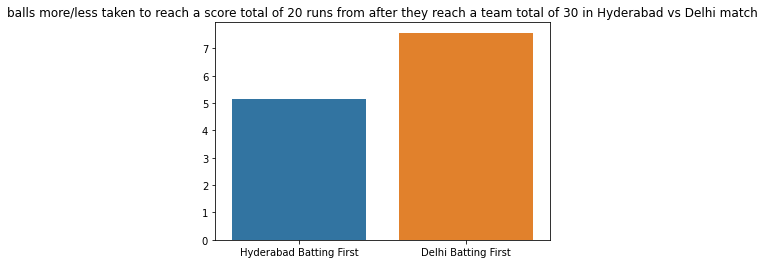

In [21]:
average_balls = pd.Series([avg_balls_Hyderabad_batting_first,avg_balls_Hyderabad_batting_second],index = ['Hyderabad Batting First','Delhi Batting First'])
sns.barplot(x = average_balls.index, y = average_balls)
plt.title('balls more/less taken to reach a score total of 20 runs from after they reach a team total of 30 in Hyderabad vs Delhi match')
plt.show()

**So when Delhi batted in first inning, the difference is higher than when Hyderabad batted in first inning.**

## How many runs will David Warner score in his last 7 balls:

In [22]:
runs_list = []
for i in ids:
    batsman_runs = list(delivery[(delivery['match_id'] == i) & (delivery['batsman'] == 'DA Warner')]['batsman_runs'])
    last_7_balls_runs = 0
    if len(batsman_runs) > 7:
        last_7_balls_runs = np.sum(batsman_runs[-7:])
    else:
        last_7_balls_runs = np.sum(batsman_runs)
    runs_list.append(last_7_balls_runs)
runs_list

[0, 4, 10, 18, 0.0, 0.0, 4, 6, 4, 13, 15, 8, 6, 8, 0.0]

David Warner scored zero 4 times against Delhi and scored these many runs in last 7 balls against Delhi.

In [23]:
avg_runs = np.mean(runs_list)
avg_runs

6.4

David Warner scored 6 runs in an average in last 7 balls against Delhi.

In [24]:
runs_list_overall = []
total_ids = list(df1[df1['batsman'] == 'DA Warner']['match_id'].unique())
for i in total_ids:
    batsman_runs = list(df1[(df1['match_id'] == i) & (df1['batsman'] == 'DA Warner')]['batsman_runs'])
    last_7_balls_runs = 0
    if len(batsman_runs) > 7:
        last_7_balls_runs = np.sum(batsman_runs[-7:])
    else:
        last_7_balls_runs = np.sum(batsman_runs)
    runs_list_overall.append(last_7_balls_runs)
print(runs_list_overall)

[14, 12, 20, 4, 16, 4, 14, 11, 16, 13, 7, 6, 10, 7, 10, 6, 4, 9, 4, 13, 0, 6, 5, 15, 11, 4, 17, 0, 2, 16, 0, 5, 1, 6, 9, 5, 12, 6, 2, 3, 7, 1, 4, 10, 19, 20, 6, 8, 10, 7, 7, 7, 3, 5, 11, 21, 0, 10, 1, 7, 0, 16, 15, 4, 3, 4, 6, 7, 2, 6, 7, 15, 0, 9, 15, 6, 10, 24, 19, 11, 11, 13, 4, 13, 10, 8, 18, 12, 9, 9, 5, 4, 13, 8, 12, 10, 6, 19, 11, 21, 10, 8, 0, 23, 3, 9, 4, 6, 8, 8, 7, 5, 18, 7, 10, 10, 13, 4, 7, 9, 6, 17, 14, 8, 6, 9]


David Warner scored these many runs in last 7 balls in overall IPL till now..

In [25]:
avg_runs_overall = np.mean(runs_list_overall)
avg_runs_overall

8.833333333333334

David Warner scored ~9 runs in an average in last 7 balls in overall IPL.

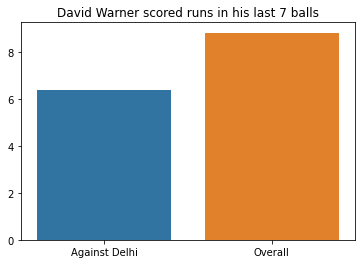

In [26]:
average_runs = pd.Series([avg_runs,avg_runs_overall],index = ['Against Delhi','Overall'])
sns.barplot(x = average_runs.index, y = average_runs)
plt.title('David Warner scored runs in his last 7 balls')
plt.show()

**David Warner's average runs in his last 7 balls in lower against Delhi than in overall IPL.**

## Which batsman will score the most boundaries in the match:

In [27]:
match_dict = {}
for j in ids:
    batsman = list(delivery[delivery['match_id'] == j]['batsman'].unique())
    batsman_dict = {}
    for k in batsman:
        counter = 0
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == k)]['batsman_runs'])
        for i in batsman_runs:
            if i >= 4:
                counter += 1
        batsman_dict[k] = counter
    batsman_with_highest_boundary = max(batsman_dict, key=batsman_dict.get)
    match_dict[j] = batsman_with_highest_boundary
match_dict

{394: 'PA Patel',
 428: 'S Dhawan',
 489: 'KP Pietersen',
 531: 'SS Iyer',
 7929: 'P Shaw',
 7935: 'RR Pant',
 11152: 'J Bairstow',
 11321: 'C Munro',
 21: 'KS Williamson',
 39: 'Yuvraj Singh',
 469: 'AJ Finch',
 561: 'Q de Kock',
 618: 'DA Warner',
 628: 'KK Nair',
 11413: 'P Shaw'}

These are the batsman who scored most boundaries in their respective Delhi vs Hyderabad matches.

In [28]:
batsman = ['RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel', 'DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar']
boundary_dict = {}
for j in batsman:
    boundary_list = []
    for k in ids:
        counter = 0
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        for i in batsman_runs:
            if i >= 4:
                counter += 1
        if counter != 0:
            boundary_list.append(counter)
    if len(boundary_list) != 0:
        boundary_dict[j] = np.round(np.mean(boundary_list))
boundary_dict

{'RR Pant': 7.0,
 'SS Iyer': 5.0,
 'S Dhawan': 4.0,
 'P Shaw': 5.0,
 'AR Patel': 2.0,
 'DA Warner': 4.0,
 'KS Williamson': 5.0,
 'MK Pandey': 2.0,
 'WP Saha': 1.0,
 'J Bairstow': 8.0,
 'V Shankar': 2.0}

These are the current Delhi and Hyderabad batsmen who hit these many boundaries in an average in Delhi vs Hyderabad match.

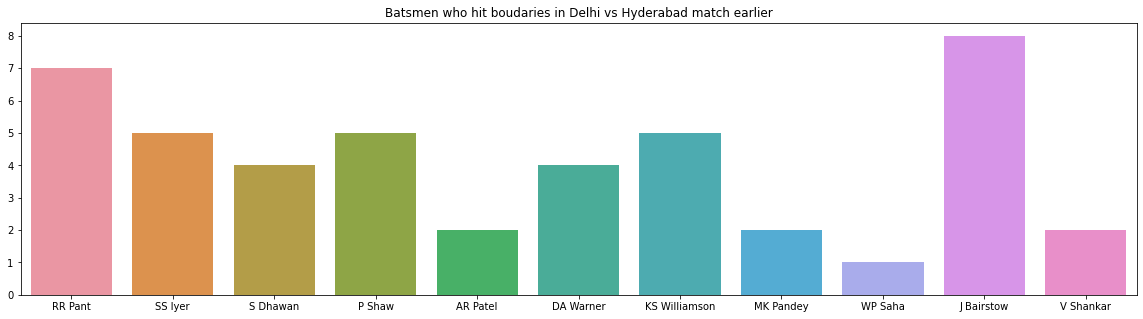

In [29]:
boundary = pd.Series(list(boundary_dict.values()),index = list(boundary_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = boundary.index, y = boundary,ax=ax)
plt.title('Batsmen who hit boudaries in Delhi vs Hyderabad match earlier')
plt.show()

**Johnny Bairstow hit most of the boundaries in an average in Delhi vs Hyderabad match ampng current Delhi and Hyderabad batsmen followed by Rishabh Pant.**

In [30]:
batsman_overall = ['DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar','JO Holder', 'RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel', 'AM Rahane', 'S Hetmyer', 'MP Stoinis']
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
boundary_dict_overall = {}
for j in batsman_overall:
    boundary_list = []
    for k in total_ids:
        counter = 0
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        for i in batsman_runs:
            if i >= 4:
                counter += 1
        if counter != 0:
            boundary_list.append(counter)
    if len(boundary_list) != 0:
        boundary_dict_overall[j] = np.round(np.mean(boundary_list))
boundary_dict_overall

{'DA Warner': 6.0,
 'KS Williamson': 5.0,
 'MK Pandey': 4.0,
 'WP Saha': 3.0,
 'J Bairstow': 8.0,
 'V Shankar': 3.0,
 'JO Holder': 2.0,
 'RR Pant': 6.0,
 'SS Iyer': 4.0,
 'S Dhawan': 5.0,
 'P Shaw': 4.0,
 'AR Patel': 2.0,
 'AM Rahane': 5.0,
 'S Hetmyer': 6.0,
 'MP Stoinis': 3.0}

These are the current Delhi and Hyderabad batsmen who hit these many boundaries in an average in overall IPL till now.

In [31]:
boundary_overall = pd.Series(list(boundary_dict_overall.values()),index = list(boundary_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = boundary_overall.index, y = boundary_overall,ax=ax)
plt.title('current Delhi and Hyderabad batsmen who hit boudaries in overall IPL till now')
plt.show()

**Johnny Bairstow hit more boundaries in an average among current Delhi and Hyderabad batsmen in overall IPL followed by David Warner, Rishabh Pant and Hetmyer.**

## How many wickets will Rashid Khan take in the match:

In [32]:
wicket_list = []
for i in ids:
    wickets = delivery[(delivery['match_id'] == i) & (delivery['bowler'] == 'Rashid Khan')]['player_dismissed'].count()
    wicket_list.append(wickets)
wicket_list

[0, 0, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2]

These are the wickets taken by Rashid Khan in Delhi vs Hyderabad match.

In [33]:
avg_wickets = np.mean(wicket_list)
avg_wickets

0.5333333333333333

He took less than one wicket in an average against Delhi. Every batsman played Rashid carefully so he didn't get much wicket but he also gave away very less runs.

In [34]:
wicket_list_overall = []
total_ids = list(df1[df1['bowler'] == 'Rashid Khan']['match_id'].unique())
for i in total_ids:
    wickets = df1[(df1['match_id'] == i) & (df1['bowler'] == 'Rashid Khan')]['player_dismissed'].count()
    wicket_list_overall.append(wickets)
print(wicket_list_overall)

[2, 3, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 1, 1, 2, 3, 1, 3, 1, 1, 0, 3, 0, 2, 3, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0, 1, 2]


These are the wickets taken by Rashid Khan in overall IPL till now.

In [35]:
avg_wickets_overall= np.mean(wicket_list_overall)
avg_wickets_overall

1.3043478260869565

He took one wicket in an average in overall IPL.

In [36]:
average_wickets = pd.Series([avg_wickets,avg_wickets_overall],index = ['Against Delhi','Overall'])
sns.barplot(x = average_wickets.index, y = average_wickets)
plt.title('Wickets taken by Rashid Khan in an average per match')
plt.show()

**The chance of taking wicket by Rashid Khan against Delhi is very low.**